<a href="https://colab.research.google.com/github/farrelrassya/teachingMLDL/blob/main/02.%20Deep%20Learning/03.%20Week%2003/01_CNN_Raw.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Convolutional neural networks
Previously, we talked about artificial neural networks (ANNs), also known as multi- layer perceptrons (MLPs), which are basically layers of neurons stacked on top of each other that have learnable weights and biases. Each neuron receives some inputs, which are multiplied by their weights, with nonlinearity applied via activa- tion functions. In this chapter, we will talk about convolutional neural networks (CNNs), which are considered an evolution of the MLP architecture that performs a lot better with images.

### Input layer
When we work with 2D images, we need to preprocess them into something the net- work can understand before feeding them to the network. First, let’s see how comput- ers perceive images. In figure 3.2, we have an image 28 pixels wide × 28 pixels high. This image is seen by the computer as a 28 × 28 matrix, with pixel values ranging from 0 to 255 (0 for black, 255 for white, and the range in between for grayscale).

<img src="https://raw.githubusercontent.com/farrelrassya/teachingMLDL/main/02.%20Deep%20Learning/03.%20Week%2003/Figure%203.2.png" width="700">


Since MLPs only take as input 1D vectors with dimensions (1, n), they cannot take a raw 2D image matrix with dimensions (x, y). To fit the image in the input layer, we first need to transform our image into one large vector with the dimensions (1, n) that contains all the pixel values in the image. This process is called image flattening. In this example, the total number (n) of pixels in this image is 28 × 28 = 784. Then, in order to feed this image to our network, we need to flatten the (28 × 28) matrix into one long vector with dimensions (1, 784). The input vector looks like this:
x = [row1, row2, row3, ..., row28]
That said, the input layer in this example will have a total of 784 nodes: x1, x2, ..., x784

In [3]:
from keras.models import Sequential
from keras.layers import Flatten

 #index_flat = i * (jumlah kolom) + j

# untuk array 28x28, jumlah kolom = 28. Misal, elemen di posisi (1, 3) bakal punya index:
# 1 * 28 + 3 = 31

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [4]:
import numpy as np
# Bikin dummy image: gradient dari 0 (gelap) ke 255 (terang)

# Tambah batch dimension, jadi shape-nya (1, 28, 28)


# Jalanin model buat ngeliat output flatten
flattened_output = model.predict(dummy_input)
print(flattened_output[0][:10])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step
[0.        0.3256705 0.651341  0.9770115 1.302682  1.6283525 1.954023
 2.2796936 2.605364  2.9310346]


In [5]:
print("Input sebelum flatten:", dummy_input[0][0][:10])

Input sebelum flatten: [0.        0.3256705 0.651341  0.9770115 1.302682  1.6283525 1.954023
 2.2796936 2.605364  2.9310346]


The Flatten layer in Keras handles this process for us. It takes the 2D image matrix input and converts it into a 1D vector. Note that the Flatten layer must be supplied a parameter value of the shape of the input image. Now the image is ready to be fed to the neural network.
What’s next? Hidden layers.

### Hidden layers
As discussed in the previous chapter, the neural network can have one or more hidden layers (technically, as many as you want). Each layer has one or more neurons (again, as many as you want). Your main job as a neural network engineer is to design these layers. For the sake of this example, let’s say you decided to arbitrarily design the network to have two hidden layers, each having 512 nodes—and don’t forget to add the ReLU activation function for each hidden layer.

$$
a_i = \max(0,\, z_i)
$$


In [6]:
from keras.layers import Dense


In [7]:
import numpy as np

def relu(x):
    """
    Fungsi ReLU:
    - Kalau x < 0, jadi 0
    - Kalau x == 0, tetap 0
    - Kalau x > 0, jadi x
    """
    return

# Contoh input: ada negatif, 0, dan positif
input_vector = np.array([-5.0, -1.0, 0.0, 2.0, 5.0])
output = relu(input_vector)

print("Input:", input_vector)
print("Output setelah ReLU:", output)

Input: [-5. -1.  0.  2.  5.]
Output setelah ReLU: [0. 0. 0. 2. 5.]


### Output Layer

The output layer is pretty straightforward. In classification problems, the number of nodes in the output layer should be equal to the number of classes that you are trying to detect. In this problem, we are classifying 10 digits (0, 1, 2, 3, 4, 5, 6, 7, 8, 9). Then we need to add one last Dense layer that contains 10 nodes:

$$
\text{softmax}(x)_i = \frac{e^{x_i}}{\sum_{j} e^{x_j}}
$$


In [8]:
import numpy as np

def softmax(x):
    """
    Fungsi softmax buat ngeubah input vector jadi probabilitas.

    Rumus:
    softmax(x)_i = exp(x_i) / sum(exp(x))

    Pake trick subtract np.max(x) buat stabilitas numerik.
    """

    return

# Contoh input vector
input_vector = np.array([2.0, 1.0, 0.1])
output = softmax(input_vector)

print("Input:", input_vector)
print("Output setelah softmax:", output)

Input: [2.  1.  0.1]
Output setelah softmax: [0.65900114 0.24243297 0.09856589]


### Putting it all together
When we put all these layers together, we get a neural network like this:

In [9]:
from keras.models import Sequential
from keras.layers import Flatten, Dense



Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 512)                 │         401,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 669,706 (2.55 MB)

 Trainable params: 669,706 (2.55 MB)

 Non-trainable params: 0 (0.00 B)

The **"Param #" field** represents the number of learnable weights and biases in each layer of the network. These parameters are adjusted during training to optimize the error function. Here's how they are calculated:

1. **Flatten Layer**:  
   - **Parameters**: 0  
     The flatten layer reshapes the image into a vector without adding any weights.

2. **First Dense Layer**:  
   - **Input nodes**: 784 (from the flattened image)  
   - **Output neurons**: 512  
   - **Calculation**:  
     $$
     \text{Parameters} = 784 \times 512 + 512 = 401{,}920.
     $$

3. **Second Dense Layer**:  
   - **Input nodes**: 512  
   - **Output neurons**: 512  
   - **Calculation**:  
     $$
     \text{Parameters} = 512 \times 512 + 512 = 262{,}656.
     $$

4. **Output Dense Layer**:  
   - **Input nodes**: 512  
   - **Output neurons**: 10  
   - **Calculation**:  
     $$
     \text{Parameters} = 512 \times 10 + 10 = 5{,}130.
     $$

5. **Total Parameters in the Network**:  
   $$
   \text{Total} = 401{,}920 + 262{,}656 + 5{,}130 = 669{,}706.
   $$

This means that this network has a total of **669,706** parameters. Even for a small network like this, the parameter count is quite high, and it can increase dramatically with more nodes, layers, or larger input images.

### MLP and CNN Comparison

In [10]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.datasets import mnist

In [11]:
#load data

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [27]:
#make train and test data

In [28]:
#build model

In [29]:
#model compile

In [30]:
history_mlp = model_mlp.fit

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 8s 18ms/step - accuracy: 0.5016 - loss: 1.5542 - val_accuracy: 0.8708 - val_loss: 0.4492
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - accuracy: 0.8591 - loss: 0.4696 - val_accuracy: 0.9045 - val_loss: 0.3269
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 11s 19ms/step - accuracy: 0.8927 - loss: 0.3564 - val_accuracy: 0.9164 - val_loss: 0.2781
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.9096 - loss: 0.3018 - val_accuracy: 0.9294 - val_loss: 0.2370
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - accuracy: 0.9276 - loss: 0.2527 - val_accuracy: 0.9396 - val_loss: 0.2085
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 11s 17ms/step - accuracy: 0.9320 - loss: 0.2246 - val_accuracy: 0.9456 - val_loss: 0.1846
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 11s 19ms/step - accuracy: 0.9434 - loss: 0.1938 - val_accuracy: 0.9477 - val_loss: 0.1755
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 10s 19ms/step - accuracy: 0.9464 - loss: 0.1762 - val

In [31]:
score = model_mlp.evaluate(x_test, y_test, verbose=0)
print('MLP Test loss:', score[0])
print('MLP Test accuracy:', score[1])

MLP Test loss: 0.13074031472206116
MLP Test accuracy: 0.9603999853134155


In [32]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.datasets import mnist

In [33]:
#load data

In [34]:
#make train and test data

In [35]:
#build model

In [36]:
#model compile

In [38]:
history_cnn = model_cnn.fit

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 41s 104ms/step - accuracy: 0.8218 - loss: 0.5983 - val_accuracy: 0.9775 - val_loss: 0.0767
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 39s 103ms/step - accuracy: 0.9763 - loss: 0.0797 - val_accuracy: 0.9833 - val_loss: 0.0591
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 41s 104ms/step - accuracy: 0.9847 - loss: 0.0527 - val_accuracy: 0.9877 - val_loss: 0.0421
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 41s 104ms/step - accuracy: 0.9869 - loss: 0.0418 - val_accuracy: 0.9886 - val_loss: 0.0384
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 41s 103ms/step - accuracy: 0.9901 - loss: 0.0331 - val_accuracy: 0.9874 - val_loss: 0.0393
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 41s 102ms/step - accuracy: 0.9915 - loss: 0.0277 - val_accuracy: 0.9910 - val_loss: 0.0327
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 39s 103ms/step - accuracy: 0.9934 - loss: 0.0212 - val_accuracy: 0.9893 - val_loss: 0.0364
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 39s 103ms/step - accuracy: 0.9943 - loss: 0

In [39]:
score = model_cnn.evaluate(x_test, y_test, verbose=0)
print('CNN Test loss:', score[0])
print('CNN Test accuracy:', score[1])

CNN Test loss: 0.032866597175598145
CNN Test accuracy: 0.9891999959945679


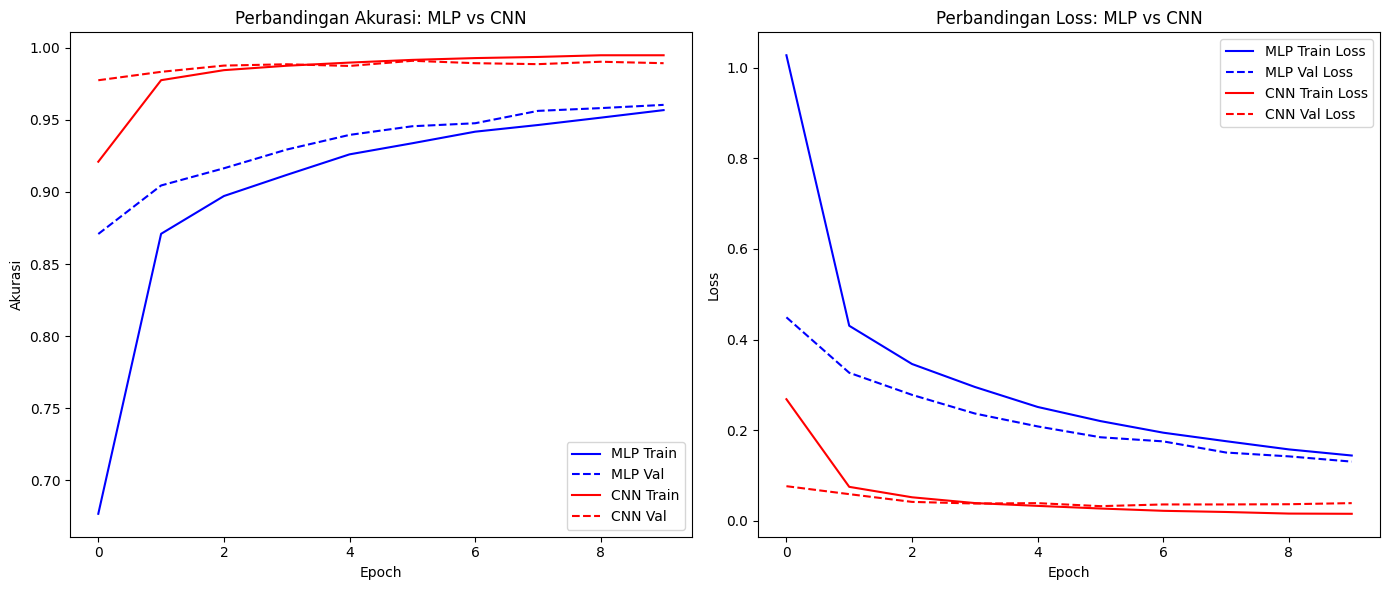

In [40]:
import matplotlib.pyplot as plt

# Grafik Perbandingan Akurasi
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(history_mlp.history['accuracy'], 'b-', label='MLP Train')
plt.plot(history_mlp.history['val_accuracy'], 'b--', label='MLP Val')
plt.plot(history_cnn.history['accuracy'], 'r-', label='CNN Train')
plt.plot(history_cnn.history['val_accuracy'], 'r--', label='CNN Val')
plt.title('Perbandingan Akurasi: MLP vs CNN')
plt.xlabel('Epoch')
plt.ylabel('Akurasi')
plt.legend()

# Grafik Perbandingan Loss
plt.subplot(1, 2, 2)
plt.plot(history_mlp.history['loss'], 'b-', label='MLP Train Loss')
plt.plot(history_mlp.history['val_loss'], 'b--', label='MLP Val Loss')
plt.plot(history_cnn.history['loss'], 'r-', label='CNN Train Loss')
plt.plot(history_cnn.history['val_loss'], 'r--', label='CNN Val Loss')
plt.title('Perbandingan Loss: MLP vs CNN')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

1. MLP vs. CNN on MNIST:
On the MNIST dataset, the performance gap between an MLP and a CNN isn’t dramatically wide. MNIST is exceptionally clean—28×28, grayscale images that are centered and preprocessed. While CNNs have a natural edge in capturing spatial hierarchies, the dataset's simplicity means that even an MLP can achieve about 96% accuracy compared to the CNN’s 99%.


---

### Analytical Question

1. **Analytical Question for a More Challenging Dataset**:
"How do the performances of MLP and CNN compare when applied to a more complex dataset like CIFAR-10, which consists of colored images with varying object positions and backgrounds? What factors—such as spatial complexity, color variations, and less controlled preprocessing—contribute to any significant performance differences, and how might improved preprocessing techniques help bridge the gap?"

### Drawbacks of MLPs for Processing Images
Let's discuss the two major problems with Multi-Layer Perceptrons (MLPs) that Convolutional Neural Networks (CNNs) were specifically designed to address.
1. Loss of Spatial Features
When using MLPs to process images, we encounter a fundamental limitation: we must flatten our 2D image into a 1D vector. This flattening process unfortunately discards valuable spatial information that is crucial for image understanding.
Consider this simple example:
Imagine we have a white square on a black background, represented as a matrix:


![](https://raw.githubusercontent.com/farrelrassya/teachingMLDL/main/02.%20Deep%20Learning/03.%20Week%2003/Figure%203.5.png)


Where 1 represents white pixels and 0 represents black pixels.
For an MLP, we must convert this matrix into a 1D vector:

In [41]:
Inputvector = [1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Inputvector

[1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

As a result, the MLP only learns that a square is detected when specific input positions (in this case: x₁, x₂, x₅, and x₆) are activated. The MLP doesn't understand the concept of a "square" as a spatial feature—it's merely memorizing which pixel positions should be active.
Problems arise when we test the MLP with squares in different positions:



![](https://raw.githubusercontent.com/farrelrassya/teachingMLDL/main/02.%20Deep%20Learning/03.%20Week%2003/Figure%203.6.png)

Our trained MLP will likely fail to recognize these as squares because the active pixels appear in different positions than those learned during training. The MLP doesn't grasp that these are "the same square shape but in different locations."
Unlike MLPs, CNNs can directly accept 2D images without flattening them. CNNs understand that neighboring pixels have stronger relationships than distant pixels. CNNs can recognize spatial patterns (like squares) regardless of where these patterns appear in the image.

### Fully Connected Dense layers
MLPs are composed of dense layers that are fully connected to each other. Fully con- nected means every node in one layer is connected to all nodes of the previous layer and all nodes in the next layer. In this scenario, each neuron has parameters (weights) to train per neuron from the previous layer. While this is not a big problem for the MNIST dataset because the images are really small in size (28 × 28), what happens when we try to process larger images? For example, if we have an image with dimen- sions 1,000 × 1,000, it will yield 1 million parameters for each node in the first hidden layer. So if the first hidden layer has 1,000 neurons, this will yield 1 billion parameters even in such a small network. You can imagine the computational complexity of opti- mizing 1 billion parameters after only the first layer. This number will increase drasti- cally when we have tens or hundreds of layers. This can get out of control pretty fast and will not scale.
CNNs, on the other hand, are locally connected layers, as figure 3.8 shows: nodes are connected to only a small subset of the previous layers’ nodes. Locally connected lay- ers use far fewer parameters than densely connected layers, as you will see.

<img src="https://raw.githubusercontent.com/farrelrassya/teachingMLDL/main/02.%20Deep%20Learning/03.%20Week%2003/Figure%203.8.png" width="700">



The loss of information caused by flattening a 2D image matrix to a 1D vector and the computational complexity of fully connected layers with larger images suggest that we need an entirely new way of processing image input, one where 2D information is not entirely lost. This is where convolutional networks come in. CNNs accept the full. image matrix as input, which significantly helps the network understand the patterns
contained in the pixel values.

### Convolutional layers
A convolutional layer is the core building block of a convolutional neural network. Convolutional layers act like a feature finder window that slides over the image pixel by pixel to extract meaningful features that identify the objects in the image.

What is Convolution?
In mathematics, convolution is the operation of two functions to produce a third modified function. In the context of CNNs, the first function is the input image, and the second function is the convolutional filter. We will perform some mathematical operations to produce a modified image with new pixel values.
Let’s zoom in on the first convolutional layer to see how it processes an image (fig- ure 3.13). By sliding the convolutional filter over the input image, the network breaks the image into little chunks and processes those chunks individually to assemble the modified image, a feature map.

<img src="https://raw.githubusercontent.com/farrelrassya/teachingMLDL/main/02.%20Deep%20Learning/03.%20Week%2003/Figure%203.12.png" width="700">


<img src="https://raw.githubusercontent.com/farrelrassya/teachingMLDL/main/02.%20Deep%20Learning/03.%20Week%2003/Figure%203.13.png" width="700">


CONVOLUTIONAL OPERATIONS

The math should look familiar from our discussion of MLPs. Remember how we multi-
plied the input by the weights and summed them all together to get the weighted sum?

$$weightedsum=x1 \cdot w1 +x2 \cdot w2 +x3 \cdot w3 +...+xn \cdot wn +b$$

We do the same thing here, except that in CNNs, the neurons and weights are struc-
tured in a matrix shape. So we multiply each pixel in the receptive field by the corre-
sponding pixel in the convolution filter and sum them all together to get the value of
the center pixel in the new image (figure 3.15). This is the same matrix dot product
we saw in chapter 2:

$$(93 \times –1) + (139 \times 0) + (101 \times 1) + (26 \times –2) + (252 \times 0) + (196 \times 2) + (135 \times –1) + (240 \times 0) + (48 \times 1) = 243$$

The filter (or kernel) slides over the whole image. Each time, we multiply every corre-
sponding pixel element-wise and then add them all together to create a new image with
new pixel values. This convolved image is called a feature map or activation map.

<img src="https://raw.githubusercontent.com/farrelrassya/teachingMLDL/main/02.%20Deep%20Learning/03.%20Week%2003/Figure%203.14.png" width="700">
